In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
from matplotlib import rc
rc('text', usetex=False)

In [5]:
import import_ipynb

In [6]:
import pyESN

importing Jupyter notebook from pyESN.ipynb


In [7]:
from pyESN import ESN 
%matplotlib inline

In [8]:
#https://finance.yahoo.com/quote/TSLA/history?period1=1457308800&period2=1612742400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
data = open("tesla.txt").read().split()
data = np.array(data).astype('float64')
data

array([ 41.06,  40.52,  41.74, ..., 854.69, 849.99, 852.23])

In [9]:
# rides count - prediction

#data = open("util.txt").read().split()
#data = np.array(data).astype('int64')

#n_reservoir = 20
#sparsity = 0.1
#rand_seed = 5
#spectral_radius = 1
#noise = 0.001
#best for rides count

#trainlen = 833
#future = 1
#futureTotal = 100
#pred_tot = np.zeros(futureTotal)

#data

In [20]:
n_reservoir = 43
sparsity = 0.1
rand_seed = 35
spectral_radius = 0.1
noise =  0.0007 

In [21]:
esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity = sparsity,
      random_state = rand_seed,
      spectral_radius = spectral_radius,
      noise =  noise)

In [22]:
trainlen = 1000
future = 1
futureTotal = 200
pred_tot = np.zeros(futureTotal)

In [23]:
for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]

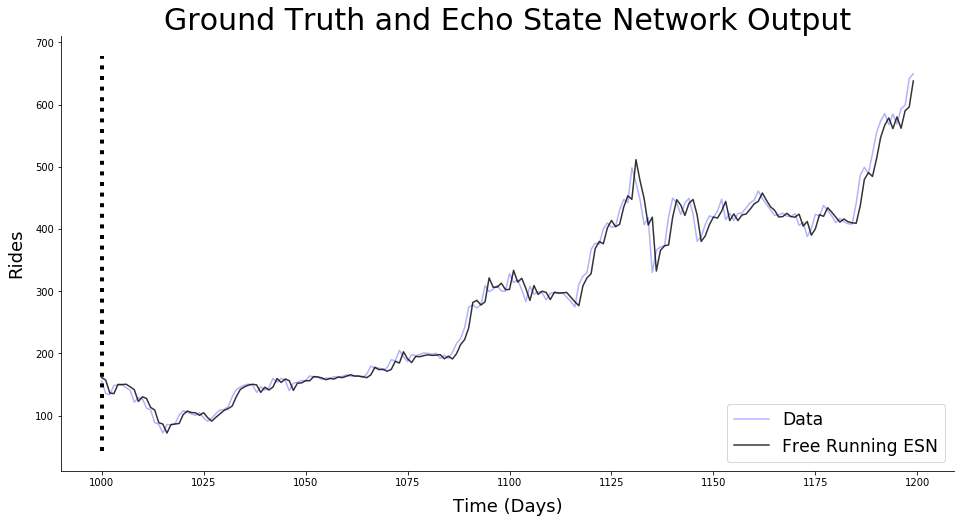

In [24]:
plt.figure(figsize = (16,8))
plt.plot(range(trainlen,trainlen+futureTotal), data[trainlen:trainlen+futureTotal],'b', label = "Data", alpha = 0.3)
plt.plot(range(trainlen,trainlen+futureTotal), pred_tot,'k', alpha = 0.8, label = 'Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo + np.spacing(1),hi - np.spacing(1)],'k:', linewidth = 4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize = 30)
plt.xlabel(r'Time (Days)', fontsize = 18, labelpad = 10)
plt.ylabel(r'Rides', fontsize = 18, labelpad = 10)
plt.legend(fontsize = 'xx-large', loc =' best')
sns.despine()

In [15]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))

In [16]:
sparsity   = 0.1

radius_set = [0.5, 0.3, 0.1,  1,  1.1,1.3,1.5]
noise_set = [ 0.0001, 0.00001, 0.0007, 0.001, 0.003, 0.005, 0.007,0.01]
reservoir_set = [25, 35, 10, 15, 20, 43 , 47]
rand_seed_set  = [20, 15, 10, 5, 25, 30, 35]

radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)
reservoir_set_size = len(reservoir_set)
rand_seed_set_size = len(rand_seed_set)

trainlen = 1000
future = 1
futureTotal= 100

loss = np.zeros([radius_set_size, noise_set_size, reservoir_set_size, rand_seed_set_size])

for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]
        for k in range(reservoir_set_size):
            n_reservoir = reservoir_set[k]
            for m in range(rand_seed_set_size):
                rand_seed = rand_seed_set[m]

                pred_tot=np.zeros(futureTotal)

                esn = ESN(n_inputs = 1,
                          n_outputs = 1, 
                          n_reservoir = n_reservoir,
                          sparsity=sparsity,
                          random_state=rand_seed,
                          spectral_radius = rho,
                          noise=noise)

                for i in range(0,futureTotal,future):
                    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
                    prediction = esn.predict(np.ones(future))
                    pred_tot[i:i+future] = prediction[:,0]

                loss[l, j, k, m] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
                print('rho = ', radius_set[l], 'reservoir = ', reservoir_set[k], ', noise = ', noise_set[j],
                      ', rand = ', rand_seed_set[m], ', MSE = ', loss[l][j][k][m])


rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  143.42994128927228
rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  240.39472583986773
rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  142.32908934409343
rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  5 , MSE =  102.76352490415013
rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  25 , MSE =  29.800198404669622
rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  30 , MSE =  245.0292973098596
rho =  0.5 reservoir =  25 , noise =  0.0001 , rand =  35 , MSE =  177.04298724772835
rho =  0.5 reservoir =  35 , noise =  0.0001 , rand =  20 , MSE =  149.45531460857097
rho =  0.5 reservoir =  35 , noise =  0.0001 , rand =  15 , MSE =  175.05857561675973
rho =  0.5 reservoir =  35 , noise =  0.0001 , rand =  10 , MSE =  90.92367649821956
rho =  0.5 reservoir =  35 , noise =  0.0001 , rand =  5 , MSE =  218.92594067190927
rho =  0.5 reservoir =  35 , noise =  0.0001 , rand =  25 

rho =  0.5 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  113.66454385499536
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  145.35246358975732
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  241.46178867742793
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE =  144.8574028702712
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  5 , MSE =  105.29017632368029
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  25 , MSE =  32.50262850653297
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  30 , MSE =  246.11421719294012
rho =  0.5 reservoir =  25 , noise =  0.0007 , rand =  35 , MSE =  190.30747979152648
rho =  0.5 reservoir =  35 , noise =  0.0007 , rand =  20 , MSE =  149.5499202657349
rho =  0.5 reservoir =  35 , noise =  0.0007 , rand =  15 , MSE =  192.33480235201984
rho =  0.5 reservoir =  35 , noise =  0.0007 , rand =  10 , MSE =  91.67189986554206
rho =  0.5 reservoir =  35 , noise =  0.0007 , rand =  5 , M

rho =  0.5 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  92.55908782135054
rho =  0.5 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  116.93226642829568
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  150.21735632908644
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  241.57445487137656
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  10 , MSE =  145.18192160985774
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  5 , MSE =  105.43056955675742
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  25 , MSE =  40.97240245757837
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  30 , MSE =  249.55208333486806
rho =  0.5 reservoir =  25 , noise =  0.003 , rand =  35 , MSE =  208.40463471916516
rho =  0.5 reservoir =  35 , noise =  0.003 , rand =  20 , MSE =  151.58524179122125
rho =  0.5 reservoir =  35 , noise =  0.003 , rand =  15 , MSE =  200.30932579327674
rho =  0.5 reservoir =  35 , noise =  0.003 , rand =  10 , MSE =  92

rho =  0.5 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  226.60143548300317
rho =  0.5 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  93.42784562086543
rho =  0.5 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  120.53570665792299
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  153.9255326848049
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  15 , MSE =  241.67158790468153
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  10 , MSE =  145.25480692798826
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  5 , MSE =  105.7210406190409
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  25 , MSE =  57.56699462603567
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  30 , MSE =  250.37232120192513
rho =  0.5 reservoir =  25 , noise =  0.007 , rand =  35 , MSE =  225.79644722640396
rho =  0.5 reservoir =  35 , noise =  0.007 , rand =  20 , MSE =  156.44376434606488
rho =  0.5 reservoir =  35 , noise =  0.007 , rand =  15 , MSE =  207.

rho =  0.5 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  230.48516449776147
rho =  0.5 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  94.06361839970991
rho =  0.5 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  122.42807155194382
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  142.66892755709432
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  239.4595815831795
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  143.40711682455515
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  5 , MSE =  109.51053547039531
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  25 , MSE =  29.233706991931673
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  30 , MSE =  245.06552626528367
rho =  0.3 reservoir =  25 , noise =  0.0001 , rand =  35 , MSE =  170.06408989643853
rho =  0.3 reservoir =  35 , noise =  0.0001 , rand =  20 , MSE =  150.35989515414974
rho =  0.3 reservoir =  35 , noise =  0.0001 , rand =  15 , MSE

rho =  0.3 reservoir =  47 , noise =  1e-05 , rand =  5 , MSE =  99.2771579298184
rho =  0.3 reservoir =  47 , noise =  1e-05 , rand =  25 , MSE =  177.95820679743252
rho =  0.3 reservoir =  47 , noise =  1e-05 , rand =  30 , MSE =  78.29128262287966
rho =  0.3 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  111.74234173436064
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  145.79896094420715
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  241.6192123010909
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE =  146.65872928781783
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  5 , MSE =  110.83867524499132
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  25 , MSE =  31.00652493835382
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  30 , MSE =  245.97371472177863
rho =  0.3 reservoir =  25 , noise =  0.0007 , rand =  35 , MSE =  189.5093223992256
rho =  0.3 reservoir =  35 , noise =  0.0007 , rand =  20 , MSE = 

rho =  0.3 reservoir =  47 , noise =  0.001 , rand =  10 , MSE =  127.75537261154456
rho =  0.3 reservoir =  47 , noise =  0.001 , rand =  5 , MSE =  106.74145946568682
rho =  0.3 reservoir =  47 , noise =  0.001 , rand =  25 , MSE =  213.289596423321
rho =  0.3 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  94.73693994154546
rho =  0.3 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  114.9887089548067
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  149.5572255101564
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  241.85295926638435
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  10 , MSE =  147.01171462125026
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  5 , MSE =  110.80083184893687
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  25 , MSE =  36.529068914165194
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  30 , MSE =  249.3831099558738
rho =  0.3 reservoir =  25 , noise =  0.003 , rand =  35 , MSE =  208.349

rho =  0.3 reservoir =  47 , noise =  0.005 , rand =  15 , MSE =  137.09978738267702
rho =  0.3 reservoir =  47 , noise =  0.005 , rand =  10 , MSE =  132.76942765326822
rho =  0.3 reservoir =  47 , noise =  0.005 , rand =  5 , MSE =  107.60616539332658
rho =  0.3 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  228.81193446589205
rho =  0.3 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  99.53001203673871
rho =  0.3 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  117.74264360840836
rho =  0.3 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  154.15174293993294
rho =  0.3 reservoir =  25 , noise =  0.007 , rand =  15 , MSE =  242.19911008707805
rho =  0.3 reservoir =  25 , noise =  0.007 , rand =  10 , MSE =  147.11003817066975
rho =  0.3 reservoir =  25 , noise =  0.007 , rand =  5 , MSE =  111.3043534514325
rho =  0.3 reservoir =  25 , noise =  0.007 , rand =  25 , MSE =  48.47320200938867
rho =  0.3 reservoir =  25 , noise =  0.007 , rand =  30 , MSE =  250.

rho =  0.3 reservoir =  47 , noise =  0.01 , rand =  15 , MSE =  141.77097824530068
rho =  0.3 reservoir =  47 , noise =  0.01 , rand =  10 , MSE =  133.43717603218462
rho =  0.3 reservoir =  47 , noise =  0.01 , rand =  5 , MSE =  109.18605789908419
rho =  0.3 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  231.54064529188847
rho =  0.3 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  100.96112983678634
rho =  0.3 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  119.03207525791514
rho =  0.1 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  141.58578520907298
rho =  0.1 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  237.005912549814
rho =  0.1 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  143.65724588229403
rho =  0.1 reservoir =  25 , noise =  0.0001 , rand =  5 , MSE =  111.71936023578472
rho =  0.1 reservoir =  25 , noise =  0.0001 , rand =  25 , MSE =  29.093015997524525
rho =  0.1 reservoir =  25 , noise =  0.0001 , rand =  30 , MSE =  245

rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  20 , MSE =  141.08494651137585
rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  15 , MSE =  123.89336779119725
rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  10 , MSE =  107.07017836819541
rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  5 , MSE =  101.38937060414065
rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  25 , MSE =  175.45772109527402
rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  30 , MSE =  85.76837165931077
rho =  0.1 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  109.29893638801794
rho =  0.1 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  146.52606913918564
rho =  0.1 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  241.5713761906582
rho =  0.1 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE =  147.31634256230043
rho =  0.1 reservoir =  25 , noise =  0.0007 , rand =  5 , MSE =  112.03505192887592
rho =  0.1 reservoir =  25 , noise =  0.0007 , rand =  25 , MSE =

rho =  0.1 reservoir =  43 , noise =  0.001 , rand =  35 , MSE =  16.72402455531633
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  20 , MSE =  160.29464235167472
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  15 , MSE =  129.16395980803483
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  10 , MSE =  123.12547572167267
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  5 , MSE =  106.66911541163977
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  25 , MSE =  215.39344703895696
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  91.39304392312931
rho =  0.1 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  112.54455437957105
rho =  0.1 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  149.11529339863287
rho =  0.1 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  242.1710406774408
rho =  0.1 reservoir =  25 , noise =  0.003 , rand =  10 , MSE =  147.66228866819517
rho =  0.1 reservoir =  25 , noise =  0.003 , rand =  5 , MSE =  113.

rho =  0.1 reservoir =  43 , noise =  0.005 , rand =  30 , MSE =  135.8086380202346
rho =  0.1 reservoir =  43 , noise =  0.005 , rand =  35 , MSE =  16.832015723933527
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  20 , MSE =  172.23375633079976
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  15 , MSE =  134.14493684263667
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  10 , MSE =  129.69650797521103
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  5 , MSE =  108.01925788930217
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  230.2656639282259
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  99.174423909753
rho =  0.1 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  114.58546757050895
rho =  0.1 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  153.7080796046858
rho =  0.1 reservoir =  25 , noise =  0.007 , rand =  15 , MSE =  243.36812452997174
rho =  0.1 reservoir =  25 , noise =  0.007 , rand =  10 , MSE =  147.79

rho =  0.1 reservoir =  43 , noise =  0.01 , rand =  30 , MSE =  141.02892737819244
rho =  0.1 reservoir =  43 , noise =  0.01 , rand =  35 , MSE =  17.116631602655932
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  20 , MSE =  177.2199898835251
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  15 , MSE =  137.45345148114774
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  10 , MSE =  131.68828847305093
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  5 , MSE =  110.10017101042307
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  232.24541910063977
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  105.88376358673257
rho =  0.1 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  115.40173744580198
rho =  1 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  144.33781776036804
rho =  1 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  238.93108645405943
rho =  1 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  135.625274657

rho =  1 reservoir =  43 , noise =  1e-05 , rand =  35 , MSE =  17.216275833603042
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  20 , MSE =  137.88205390661523
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  15 , MSE =  126.9270405203653
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  10 , MSE =  122.49105225963612
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  5 , MSE =  94.57565044585421
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  25 , MSE =  182.78073564809424
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  30 , MSE =  73.27112724506004
rho =  1 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  117.70779764561982
rho =  1 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  145.7459363876833
rho =  1 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  239.25455768361343
rho =  1 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE =  136.43599989868915
rho =  1 reservoir =  25 , noise =  0.0007 , rand =  5 , MSE =  84.97379106436442
rho =  

rho =  1 reservoir =  47 , noise =  0.001 , rand =  20 , MSE =  139.28047212403035
rho =  1 reservoir =  47 , noise =  0.001 , rand =  15 , MSE =  137.39490291780388
rho =  1 reservoir =  47 , noise =  0.001 , rand =  10 , MSE =  127.23235933017001
rho =  1 reservoir =  47 , noise =  0.001 , rand =  5 , MSE =  128.8392023986854
rho =  1 reservoir =  47 , noise =  0.001 , rand =  25 , MSE =  207.16787691914283
rho =  1 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  74.03976180435082
rho =  1 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  120.9789679405336
rho =  1 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  150.1946305314686
rho =  1 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  239.2967665317074
rho =  1 reservoir =  25 , noise =  0.003 , rand =  10 , MSE =  136.61965833761676
rho =  1 reservoir =  25 , noise =  0.003 , rand =  5 , MSE =  85.01376272498386
rho =  1 reservoir =  25 , noise =  0.003 , rand =  25 , MSE =  64.33910813764615
rho =  1 rese

rho =  1 reservoir =  47 , noise =  0.005 , rand =  10 , MSE =  127.99276785193938
rho =  1 reservoir =  47 , noise =  0.005 , rand =  5 , MSE =  129.63376671608202
rho =  1 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  216.92361340794164
rho =  1 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  77.21907757116294
rho =  1 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  129.37363540904948
rho =  1 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  151.16587627604468
rho =  1 reservoir =  25 , noise =  0.007 , rand =  15 , MSE =  239.30835984872328
rho =  1 reservoir =  25 , noise =  0.007 , rand =  10 , MSE =  136.65323568304368
rho =  1 reservoir =  25 , noise =  0.007 , rand =  5 , MSE =  85.02999216970242
rho =  1 reservoir =  25 , noise =  0.007 , rand =  25 , MSE =  93.46451301319208
rho =  1 reservoir =  25 , noise =  0.007 , rand =  30 , MSE =  250.4446350611385
rho =  1 reservoir =  25 , noise =  0.007 , rand =  35 , MSE =  224.9232775913886
rho =  1 re

rho =  1 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  225.26330001113152
rho =  1 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  80.38780605598613
rho =  1 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  133.2239703229869
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  144.4456933144856
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  238.05289766798367
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  133.75001793572915
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  5 , MSE =  79.09392016563118
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  25 , MSE =  47.61073299901928
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  30 , MSE =  243.9091585906574
rho =  1.1 reservoir =  25 , noise =  0.0001 , rand =  35 , MSE =  187.57503893740102
rho =  1.1 reservoir =  35 , noise =  0.0001 , rand =  20 , MSE =  141.01109782652708
rho =  1.1 reservoir =  35 , noise =  0.0001 , rand =  15 , MSE =  166.66

rho =  1.1 reservoir =  47 , noise =  1e-05 , rand =  5 , MSE =  94.82400347674461
rho =  1.1 reservoir =  47 , noise =  1e-05 , rand =  25 , MSE =  182.8330512124015
rho =  1.1 reservoir =  47 , noise =  1e-05 , rand =  30 , MSE =  70.5074686406357
rho =  1.1 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  118.55897553781708
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  145.9262300803485
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  238.32845425479343
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE =  134.33876423034627
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  5 , MSE =  80.15026256890418
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  25 , MSE =  49.92577657131678
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  30 , MSE =  246.57881336637908
rho =  1.1 reservoir =  25 , noise =  0.0007 , rand =  35 , MSE =  191.78571419821043
rho =  1.1 reservoir =  35 , noise =  0.0007 , rand =  20 , MSE =  

rho =  1.1 reservoir =  47 , noise =  0.001 , rand =  10 , MSE =  126.24476253201672
rho =  1.1 reservoir =  47 , noise =  0.001 , rand =  5 , MSE =  130.05083563041694
rho =  1.1 reservoir =  47 , noise =  0.001 , rand =  25 , MSE =  206.87643394605396
rho =  1.1 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  71.26219244871798
rho =  1.1 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  121.87322686448813
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  149.7657179296221
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  238.36621785880828
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  10 , MSE =  134.49472000347538
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  5 , MSE =  80.22166564040326
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  25 , MSE =  71.89656319573311
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  30 , MSE =  249.94922086739234
rho =  1.1 reservoir =  25 , noise =  0.003 , rand =  35 , MSE =  209.3

rho =  1.1 reservoir =  47 , noise =  0.005 , rand =  15 , MSE =  156.54436613389944
rho =  1.1 reservoir =  47 , noise =  0.005 , rand =  10 , MSE =  126.99184478486244
rho =  1.1 reservoir =  47 , noise =  0.005 , rand =  5 , MSE =  131.1733946949494
rho =  1.1 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  214.9065096889575
rho =  1.1 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  74.71247576966343
rho =  1.1 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  132.32863430292986
rho =  1.1 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  150.4426236506039
rho =  1.1 reservoir =  25 , noise =  0.007 , rand =  15 , MSE =  238.37586561481092
rho =  1.1 reservoir =  25 , noise =  0.007 , rand =  10 , MSE =  134.52375719573945
rho =  1.1 reservoir =  25 , noise =  0.007 , rand =  5 , MSE =  80.2261699747878
rho =  1.1 reservoir =  25 , noise =  0.007 , rand =  25 , MSE =  100.51816600185668
rho =  1.1 reservoir =  25 , noise =  0.007 , rand =  30 , MSE =  250.455

rho =  1.1 reservoir =  47 , noise =  0.01 , rand =  15 , MSE =  163.31767002362403
rho =  1.1 reservoir =  47 , noise =  0.01 , rand =  10 , MSE =  127.80311121097769
rho =  1.1 reservoir =  47 , noise =  0.01 , rand =  5 , MSE =  131.44643097809427
rho =  1.1 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  223.63548876958734
rho =  1.1 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  78.18861034346901
rho =  1.1 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  136.70825337428272
rho =  1.3 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  144.55566489469243
rho =  1.3 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  235.62576470985329
rho =  1.3 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  129.5290877647687
rho =  1.3 reservoir =  25 , noise =  0.0001 , rand =  5 , MSE =  70.4385611227083
rho =  1.3 reservoir =  25 , noise =  0.0001 , rand =  25 , MSE =  65.7443010112494
rho =  1.3 reservoir =  25 , noise =  0.0001 , rand =  30 , MSE =  243.259

rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  20 , MSE =  128.70225428608936
rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  15 , MSE =  128.99056019332792
rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  10 , MSE =  121.60528938513899
rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  5 , MSE =  96.94192910505392
rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  25 , MSE =  182.47885119442233
rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  30 , MSE =  65.93513763361075
rho =  1.3 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  120.34255318390393
rho =  1.3 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  146.08666551527475
rho =  1.3 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  235.82862512784203
rho =  1.3 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE =  129.80793546567472
rho =  1.3 reservoir =  25 , noise =  0.0007 , rand =  5 , MSE =  72.36022045595223
rho =  1.3 reservoir =  25 , noise =  0.0007 , rand =  25 , MSE = 

rho =  1.3 reservoir =  43 , noise =  0.001 , rand =  35 , MSE =  18.4890601833973
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  20 , MSE =  129.19342574372368
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  15 , MSE =  154.28260974607008
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  10 , MSE =  123.45275265827561
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  5 , MSE =  130.70036086025476
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  25 , MSE =  206.16988845343275
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  66.524409295074
rho =  1.3 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  124.05226248015062
rho =  1.3 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  148.63883300320217
rho =  1.3 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  235.85960750383995
rho =  1.3 reservoir =  25 , noise =  0.003 , rand =  10 , MSE =  129.916880974225
rho =  1.3 reservoir =  25 , noise =  0.003 , rand =  5 , MSE =  72.56748

rho =  1.3 reservoir =  43 , noise =  0.005 , rand =  35 , MSE =  19.797102608769872
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  20 , MSE =  129.8659339635675
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  15 , MSE =  168.66990557994535
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  10 , MSE =  124.56962919539129
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  5 , MSE =  132.13641182068363
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  211.5805650751807
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  70.1339365826677
rho =  1.3 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  140.459566300066
rho =  1.3 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  148.95335477514695
rho =  1.3 reservoir =  25 , noise =  0.007 , rand =  15 , MSE =  235.8675023727426
rho =  1.3 reservoir =  25 , noise =  0.007 , rand =  10 , MSE =  129.93930010475603
rho =  1.3 reservoir =  25 , noise =  0.007 , rand =  5 , MSE =  72.57861

rho =  1.3 reservoir =  43 , noise =  0.01 , rand =  35 , MSE =  21.211240342597506
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  20 , MSE =  130.10113437664373
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  15 , MSE =  173.18534969747245
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  10 , MSE =  125.12413314680458
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  5 , MSE =  132.58715919756503
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  220.09328844610002
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  73.96309633646284
rho =  1.3 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  146.23833044264506
rho =  1.5 reservoir =  25 , noise =  0.0001 , rand =  20 , MSE =  144.43787328795634
rho =  1.5 reservoir =  25 , noise =  0.0001 , rand =  15 , MSE =  232.15451273130782
rho =  1.5 reservoir =  25 , noise =  0.0001 , rand =  10 , MSE =  124.65889436422708
rho =  1.5 reservoir =  25 , noise =  0.0001 , rand =  5 , MSE =  63.467

rho =  1.5 reservoir =  43 , noise =  1e-05 , rand =  30 , MSE =  124.77556057737301
rho =  1.5 reservoir =  43 , noise =  1e-05 , rand =  35 , MSE =  17.627999171568682
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  20 , MSE =  120.23653095662503
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  15 , MSE =  132.25393936404927
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  10 , MSE =  118.56179400593696
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  5 , MSE =  101.08863384878302
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  25 , MSE =  182.29370976865067
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  30 , MSE =  62.3965501863166
rho =  1.5 reservoir =  47 , noise =  1e-05 , rand =  35 , MSE =  122.15619195838642
rho =  1.5 reservoir =  25 , noise =  0.0007 , rand =  20 , MSE =  145.80833724156955
rho =  1.5 reservoir =  25 , noise =  0.0007 , rand =  15 , MSE =  232.30110438467264
rho =  1.5 reservoir =  25 , noise =  0.0007 , rand =  10 , MSE = 

rho =  1.5 reservoir =  43 , noise =  0.001 , rand =  25 , MSE =  184.60788598634025
rho =  1.5 reservoir =  43 , noise =  0.001 , rand =  30 , MSE =  139.00421620697787
rho =  1.5 reservoir =  43 , noise =  0.001 , rand =  35 , MSE =  18.782848438245512
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  20 , MSE =  120.75875108839345
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  15 , MSE =  174.12047626853678
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  10 , MSE =  119.54668998032089
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  5 , MSE =  130.3674446950786
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  25 , MSE =  204.9871960876516
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  30 , MSE =  62.81202926573924
rho =  1.5 reservoir =  47 , noise =  0.001 , rand =  35 , MSE =  127.12634854947875
rho =  1.5 reservoir =  25 , noise =  0.003 , rand =  20 , MSE =  147.30703454535214
rho =  1.5 reservoir =  25 , noise =  0.003 , rand =  15 , MSE =  232

rho =  1.5 reservoir =  43 , noise =  0.005 , rand =  5 , MSE =  178.8443046625035
rho =  1.5 reservoir =  43 , noise =  0.005 , rand =  25 , MSE =  206.32911450903032
rho =  1.5 reservoir =  43 , noise =  0.005 , rand =  30 , MSE =  148.53602806887426
rho =  1.5 reservoir =  43 , noise =  0.005 , rand =  35 , MSE =  20.77697758563903
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  20 , MSE =  121.24923404386618
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  15 , MSE =  184.81471459724608
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  10 , MSE =  121.0401233756311
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  5 , MSE =  131.07337092311406
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  25 , MSE =  209.13071549117723
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  30 , MSE =  66.26696959128678
rho =  1.5 reservoir =  47 , noise =  0.005 , rand =  35 , MSE =  151.89026096510617
rho =  1.5 reservoir =  25 , noise =  0.007 , rand =  20 , MSE =  147.4

rho =  1.5 reservoir =  43 , noise =  0.01 , rand =  5 , MSE =  186.9635712355783
rho =  1.5 reservoir =  43 , noise =  0.01 , rand =  25 , MSE =  221.7952110414009
rho =  1.5 reservoir =  43 , noise =  0.01 , rand =  30 , MSE =  156.11920912233708
rho =  1.5 reservoir =  43 , noise =  0.01 , rand =  35 , MSE =  22.953445773653105
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  20 , MSE =  121.45821831947003
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  15 , MSE =  186.50481386322522
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  10 , MSE =  121.63103530903159
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  5 , MSE =  131.71829816475295
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  25 , MSE =  216.68098984111478
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  30 , MSE =  70.09956347771133
rho =  1.5 reservoir =  47 , noise =  0.01 , rand =  35 , MSE =  159.52652756212473


In [17]:
minLoss = np.min(loss)
index_min = np.where(loss == minLoss)
index_min
rho_opt = radius_set[int(index_min[0])]
noise_opt = noise_set[int(index_min[1])]
reservoir_opt = reservoir_set[int(index_min[2])]
rand_seed_opt = rand_seed_set[int(index_min[3])]
print('The optimal set is:\nspectrum radius = ',
      rho_opt,'\nnoise = ',noise_opt, '\nreservoir = ' ,reservoir_opt, 
      '\nrand_seed = ' ,rand_seed_opt, '\nMSE = ',minLoss)

The optimal set is:
spectrum radius =  0.1 
noise =  0.0007 
reservoir =  43 
rand_seed =  35 
MSE =  16.715778887903223


In [ ]:
with future 200 and sparcity 0.1:
spectrum radius =  0.1 
noise =  0.0007 
reservoir =  43 
rand_seed =  35 
MSE =  16.715778887903223


In [18]:
n_reservoir = reservoir_opt
sparsity = 0.1
rand_seed = rand_seed_opt
spectral_radius = rho_opt
noise = noise_opt

# let k_set be an array with the prediction-window values
k_set = [1,2,5,10]

k_size = len(k_set)
loss_k = np.zeros(k_size)

for l in range(k_size):
    future = k_set[l]

    trainlen = 833    
    futureTotal = 100
    
    pred_tot = np.zeros(futureTotal)

    esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity = sparsity,
          random_state = rand_seed,
          spectral_radius = spectral_radius,
          noise = noise)


    for i in range(0,futureTotal,future):
        pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
        prediction = esn.predict(np.ones(future))
        pred_tot[i:i+future] = prediction[:,0]
        
    loss_k[l] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])


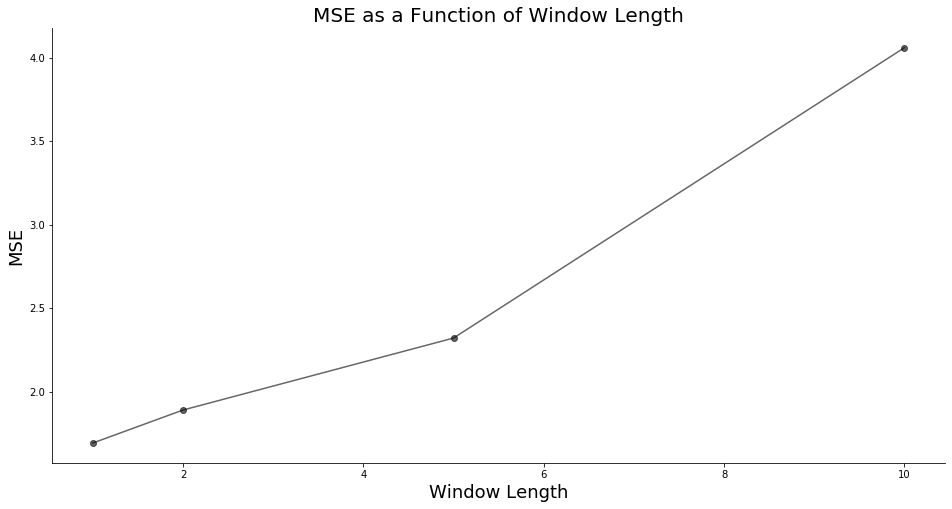

In [19]:
plt.figure(figsize = (16,8))
plt.plot(k_set, loss_k,'-ok', alpha = 0.6)
plt.title('MSE as a Function of Window Length', fontsize = 20)
plt.xlabel('Window Length', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
sns.despine()